<a href="https://colab.research.google.com/github/Bustagar/PROCESAMIENTO-DE-HABLA/blob/main/TP1_Webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dr. Alex Dey

## Los principios fundamentales del éxito

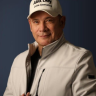

Instalamos la libreria beautifulsoup para extraer los datos del HTML

In [1]:
! pip install requests beautifulsoup4 html5lib

  ✍ Voy a extraer una pequeña introducción de un motivador muy conocido que es Alex Dey y voy a citar "Los principios fundamentales del exito". de la siguiente web:https://dralexdey.com/los-principios-fundamentales-del-exito-segun-alex-dey/

# 1- Webscrapping

In [2]:
# Importamos las librerias
import requests
from bs4 import BeautifulSoup

In [3]:
# URL de la portada de Alex Dey
url = "https://dralexdey.com/los-principios-fundamentales-del-exito-segun-alex-dey"

# Realizar la solicitud HTTP mas completo ya que el acceso esta bloqueado y se utilizó Copilot para solucionar el error.
try:
  headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36 Edg/113.0.0.0'
}
  respuesta = requests.get(url, headers=headers)
  respuesta.raise_for_status()  # Lanza una excepción si hay un error en la solicitud
except requests.exceptions.RequestException as e:
    print(f"Error al consultar la URL {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

### 1.2 Se arma la sopa de letras

In [4]:
soup = BeautifulSoup(respuesta.content, "html5lib")

In [5]:
soup.find_all("p")

[<p><strong>Introducción:</strong></p>,
 <p>En el mundo del éxito y la motivación, hay nombres que destacan por encima de todos los demás. Uno de ellos es Alex Dey, un reconocido experto en motivación y ventas que ha transformado la vida de innumerables individuos a lo largo de los años. En este artículo, exploraremos los principios fundamentales que han impulsado el éxito de Alex Dey y han ayudado a tantas personas a alcanzar sus metas y sueños.</p>,
 <p>Un aspecto central del éxito, según Alex Dey, es la importancia de mantener una mentalidad positiva y cultivar la práctica de la visualización. Dey enfatiza la necesidad de creer en uno mismo y en la capacidad de lograr cualquier objetivo. A través de la visualización creativa, podemos imaginar claramente nuestros deseos y trabajar para convertirlos en realidad.</p>,
 <p>Para alcanzar el éxito en cualquier área de la vida, Dey subraya la necesidad de tener pasión por lo que se hace. La pasión es el combustible que impulsa la motivació

In [6]:
# Extraer de texto todo el string que empieza con "En el mundo del éxito" y finaliza con "cualquier meta que te propongas!"

import re # Módulo que permite trabajar con expresiones regulares

texto = soup.get_text()  # Extrae el texto plano, sin la etiquetas HTML

# Buscar el patrón utilizando expresiones regulares
patron = r"En el mundo del éxito.*?cualquier meta que te propongas!"
coincidencias = re.findall(patron, texto, re.DOTALL | re.IGNORECASE)

# Imprimir las coincidencias
for coincidencia in coincidencias:
  print(coincidencia)

En el mundo del éxito y la motivación, hay nombres que destacan por encima de todos los demás. Uno de ellos es Alex Dey, un reconocido experto en motivación y ventas que ha transformado la vida de innumerables individuos a lo largo de los años. En este artículo, exploraremos los principios fundamentales que han impulsado el éxito de Alex Dey y han ayudado a tantas personas a alcanzar sus metas y sueños.Mentalidad positiva y visualizaciónUn aspecto central del éxito, según Alex Dey, es la importancia de mantener una mentalidad positiva y cultivar la práctica de la visualización. Dey enfatiza la necesidad de creer en uno mismo y en la capacidad de lograr cualquier objetivo. A través de la visualización creativa, podemos imaginar claramente nuestros deseos y trabajar para convertirlos en realidad.Pasión y perseveranciaPara alcanzar el éxito en cualquier área de la vida, Dey subraya la necesidad de tener pasión por lo que se hace. La pasión es el combustible que impulsa la motivación y el 

# 2- Preprocesamiento

### 2.1 Transformamos el texto a minúscula

In [7]:
for coincidencia in coincidencias:
    text_low = coincidencia.lower()
    print(text_low)  # Imprime cada coincidencia en minúsculas

en el mundo del éxito y la motivación, hay nombres que destacan por encima de todos los demás. uno de ellos es alex dey, un reconocido experto en motivación y ventas que ha transformado la vida de innumerables individuos a lo largo de los años. en este artículo, exploraremos los principios fundamentales que han impulsado el éxito de alex dey y han ayudado a tantas personas a alcanzar sus metas y sueños.mentalidad positiva y visualizaciónun aspecto central del éxito, según alex dey, es la importancia de mantener una mentalidad positiva y cultivar la práctica de la visualización. dey enfatiza la necesidad de creer en uno mismo y en la capacidad de lograr cualquier objetivo. a través de la visualización creativa, podemos imaginar claramente nuestros deseos y trabajar para convertirlos en realidad.pasión y perseveranciapara alcanzar el éxito en cualquier área de la vida, dey subraya la necesidad de tener pasión por lo que se hace. la pasión es el combustible que impulsa la motivación y el 

### 2.2.- Eliminamos caracteres extraños.

In [8]:
import re

# eliminar cualquier caracter que no sea un número, un espacio o una coma
def quitar_emojis(texto):
    return re.sub(r'[^\w\s,]', '', texto)  # ^\w\s, niega (^) todo caracter alfanumérico (\w), espacio (\s) y coma (,)

quitar_emojis(text_low)

'en el mundo del éxito y la motivación, hay nombres que destacan por encima de todos los demás uno de ellos es alex dey, un reconocido experto en motivación y ventas que ha transformado la vida de innumerables individuos a lo largo de los años en este artículo, exploraremos los principios fundamentales que han impulsado el éxito de alex dey y han ayudado a tantas personas a alcanzar sus metas y sueñosmentalidad positiva y visualizaciónun aspecto central del éxito, según alex dey, es la importancia de mantener una mentalidad positiva y cultivar la práctica de la visualización dey enfatiza la necesidad de creer en uno mismo y en la capacidad de lograr cualquier objetivo a través de la visualización creativa, podemos imaginar claramente nuestros deseos y trabajar para convertirlos en realidadpasión y perseveranciapara alcanzar el éxito en cualquier área de la vida, dey subraya la necesidad de tener pasión por lo que se hace la pasión es el combustible que impulsa la motivación y el compro

# 3.- Muestra las stop words que tenga el texto.

In [9]:
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 44.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import spacy

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

### 3.1 Mostramos las stopwords encontradas en el texto

In [11]:
# Procesar el texto
doc = nlp(text_low)

# Filtrar las stopwords
stopwords_encontradas = [token.text for token in doc if token.is_stop]

print("Stopwords encontradas:", stopwords_encontradas)

Stopwords encontradas: ['en', 'el', 'del', 'y', 'la', 'hay', 'que', 'por', 'encima', 'de', 'todos', 'los', 'demás', 'uno', 'de', 'ellos', 'es', 'un', 'en', 'y', 'que', 'ha', 'la', 'de', 'a', 'lo', 'largo', 'de', 'los', 'en', 'este', 'los', 'que', 'han', 'el', 'de', 'y', 'han', 'a', 'a', 'sus', 'y', 'y', 'del', 'según', 'es', 'la', 'de', 'una', 'y', 'la', 'de', 'la', 'la', 'de', 'en', 'uno', 'mismo', 'y', 'en', 'la', 'de', 'cualquier', 'a', 'través', 'de', 'la', 'podemos', 'nuestros', 'y', 'para', 'en', 'y', 'el', 'en', 'cualquier', 'de', 'la', 'la', 'de', 'tener', 'por', 'lo', 'que', 'se', 'hace', 'la', 'es', 'el', 'que', 'la', 'y', 'el', 'para', 'los', 'en', 'el', 'hacia', 'el', 'junto', 'con', 'la', 'la', 'es', 'que', 'el', 'vez', 'de', 'la', 'a', 'la', 'si', 'no', 'a', 'través', 'de', 'un', 'y', 'una', 'ante', 'los', 'y', 'es', 'un', 'del', 'y', 'el', 'para', 'él', 'el', 'no', 'solo', 'se', 'trata', 'de', 'sino', 'también', 'de', 'y', 'como', 'en', 'la', 'de', 'nuevos', 'el', 'de', 

### 3.2 Eliminamos las stopwords del texto

In [12]:
# Procesar el texto
doc = nlp(text_low)

# Filtrar palabras que NO sean stopwords
filtradas = [token.text for token in doc if not token.is_stop]

# Mostrar las palabras que NO son stopwords
print("Palabras filtradas:", filtradas)

Palabras filtradas: ['mundo', 'éxito', 'motivación', ',', 'nombres', 'destacan', '.', 'alex', 'dey', ',', 'reconocido', 'experto', 'motivación', 'ventas', 'transformado', 'vida', 'innumerables', 'individuos', 'años', '.', 'artículo', ',', 'exploraremos', 'principios', 'fundamentales', 'impulsado', 'éxito', 'alex', 'dey', 'ayudado', 'tantas', 'personas', 'alcanzar', 'metas', 'sueños.mentalidad', 'positiva', 'visualizaciónun', 'aspecto', 'central', 'éxito', ',', 'alex', 'dey', ',', 'importancia', 'mantener', 'mentalidad', 'positiva', 'cultivar', 'práctica', 'visualización', '.', 'dey', 'enfatiza', 'necesidad', 'creer', 'capacidad', 'lograr', 'objetivo', '.', 'visualización', 'creativa', ',', 'imaginar', 'claramente', 'deseos', 'trabajar', 'convertirlos', 'realidad.pasión', 'perseveranciapara', 'alcanzar', 'éxito', 'área', 'vida', ',', 'dey', 'subraya', 'necesidad', 'pasión', '.', 'pasión', 'combustible', 'impulsa', 'motivación', 'compromiso', 'necesarios', 'superar', 'obstáculos', 'camin

# 3.3.- WordCloud

In [13]:
# instalar wordcloud
!pip install wordcloud

In [14]:
# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
# Convertir la lista de oraciones en una única cadena de texto
texto_wordcloud = " ".join(filtradas)

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_wordcloud)

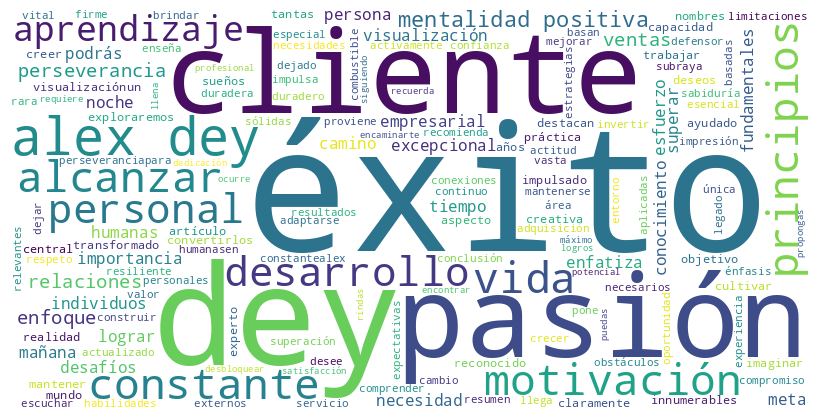

In [16]:
# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 4.- Creamos frases

In [17]:
from spacy.pipeline import Sentencizer
if "sentencizer" not in nlp.pipe_names:   # Codigo obtenido de copilot
    sentencizer = Sentencizer()
    nlp.add_pipe("sentencizer")

# Convertir la lista de palabras en un texto nuevamente
texto_filtrado = " ".join(filtradas)  # Unir palabras en un string
doc = nlp(texto_filtrado)
oraciones = [s.text for s in doc.sents]
print('Oraciones encontradas', oraciones)

Oraciones encontradas ['mundo éxito motivación , nombres destacan .', 'alex dey , reconocido experto motivación ventas transformado vida innumerables individuos años .', 'artículo , exploraremos principios fundamentales impulsado éxito alex dey ayudado tantas personas alcanzar metas sueños.mentalidad positiva visualizaciónun aspecto central éxito , alex dey , importancia mantener mentalidad positiva cultivar práctica visualización .', 'dey enfatiza necesidad creer capacidad lograr objetivo .', 'visualización creativa , imaginar claramente deseos trabajar convertirlos realidad.pasión perseveranciapara alcanzar éxito área vida , dey subraya necesidad pasión .', 'pasión combustible impulsa motivación compromiso necesarios superar obstáculos camino éxito .', 'pasión , perseverancia vital .', 'dey enseña éxito rara llega noche mañana , esfuerzo constante actitud resiliente desafíos.desarrollo personal aprendizaje constantealex dey firme defensor desarrollo personal aprendizaje constante .',

In [18]:
!pip install scikit-learn

### 4.1 Creamos la matriz documento-vocabulario.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(oraciones)

In [20]:
# Mostrar la matriz en formato numérico de las palabras que se repite en la frase.
print("Matriz documento-vocabulario:\n", X.toarray())

Matriz documento-vocabulario:
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
# Mostrar las palabras únicas del vocabulario
print("Vocabulario:", vectorizer.get_feature_names_out())

Vocabulario: ['actitud' 'activamente' 'actualizado' 'adaptarse' 'adquisición'
 'alcanzar' 'alex' 'aplicadas' 'aprendizaje' 'artículo' 'aspecto'
 'ayudado' 'años' 'basadas' 'basan' 'brindar' 'cambio' 'camino'
 'capacidad' 'central' 'claramente' 'cliente' 'clientes' 'combustible'
 'comprender' 'compromiso' 'conclusión' 'conexiones' 'confianza'
 'conocimiento' 'conocimientos' 'constante' 'constantealex' 'construir'
 'continuo' 'convertirlos' 'creativa' 'crecer' 'creer' 'cultivar'
 'dedicación' 'defensor' 'dejado' 'dejar' 'desafíos' 'desarrollo'
 'desbloquear' 'desee' 'deseos' 'destacan' 'dey' 'duradera' 'duradero'
 'empresarial' 'encaminarte' 'encontrar' 'enfatiza' 'enfoque' 'enseña'
 'entorno' 'escuchar' 'esencial' 'esfuerzo' 'especial' 'estrategias'
 'excepcional' 'expectativas' 'experiencia' 'experto' 'exploraremos'
 'externos' 'firme' 'fundamentales' 'habilidades' 'humanas' 'humanasen'
 'imaginar' 'importancia' 'impresión' 'impulsa' 'impulsado' 'individuos'
 'innumerables' 'invertir' 

In [22]:
# Contar la cantidad de palabras únicas en el vocabulario
longitud_vocabulario = len(vectorizer.get_feature_names_out())

print("Longitud del vocabulario:", longitud_vocabulario)

Longitud del vocabulario: 163


### 4.2 Aplicamos TF-IDF a tu matriz documento-vocabulario

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador al oraciones
tfidf_vectorizer.fit(oraciones)

# Obtener la representación TF-IDF
tfidf_matrix = tfidf_vectorizer.transform(oraciones)

In [24]:
# Mostrar la matriz TF-IDF
print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.23283282 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.17727998 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.10867273 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# 5.- Conclusiones

### 1.- Se pueden identificar varias palabras predominantes en el texto que indican crecimiento personal, desarrollo y negocios. Se indentificaron las palabras "PASION" y "EXITO" como las mas utilizadas en el discurso de Alex Dey y al analizarlas se puede deducir que al hacer las cosas con pasión hay mas probabilidades de éxito ya que mejora circunstancialmente la forma de como se hacen las cosas.

### 2.- Se aprecia que se eliminaron correctamente las stopwords y se ha procesado el texto correctamente.

## Créditos:

### Utilización de Copilot para corrección de algunos errores.